<a href="https://colab.research.google.com/github/sp-au-mu-nl/PythonMedia/blob/main/notebook/chap08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap08.zip
!unzip chap08.zip
!rm chap08.zip

--2025-06-26 07:11:20--  https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap08.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap08.zip [following]
--2025-06-26 07:11:20--  https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap08.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159423 (156K) [application/zip]
Saving to: ‘chap08.zip’

chap08.zip          100%[===================>] 155.69K  --.-KB/s    in 0.03s   

2025-06-26 07:11:20 (4.55 MB/s) - ‘chap08.zip’ saved [159423/159423]

Archive:  c

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2

In [3]:
def diff_inner(I):
  h,w,b=I.shape
  x=np.double(I)
  p=np.zeros((h,w))
  q=np.zeros((h,w))
  for m in range(0,h-1):
    for n in range(0,w-1):
      xl=x[m,n,:]
      xr=x[m,n+1,:]
      xb=x[m+1,n,:]
      p[m,n]=1-np.corrcoef(xl,xr)[0,1]
      q[m,n]=1-np.corrcoef(xl,xb)[0,1]
  E=np.hypot(p,q)
  E[np.isnan(E)]=0
  return(E)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


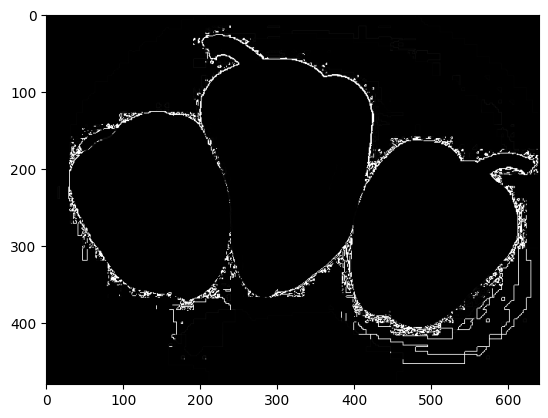

In [4]:
I=cv2.imread('paprika-966290_640.jpg')
E=diff_inner(I)
E[E>=0.1]=1
plt.imshow(E,cmap='gray')

array([[1.        , 0.86588002],
       [0.86588002, 1.        ]])

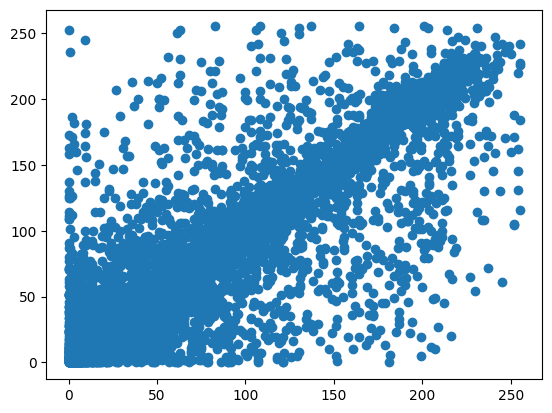

In [5]:
G=cv2.imread('cyclist-394274_640.jpg',0)
T0=G[20:100,200:280]
T1=G[21:101,200:280]
plt.scatter(T0,T1)
np.corrcoef(T0.reshape(-1),T1.reshape(-1))

array([[ 1.        , -0.22894025],
       [-0.22894025,  1.        ]])

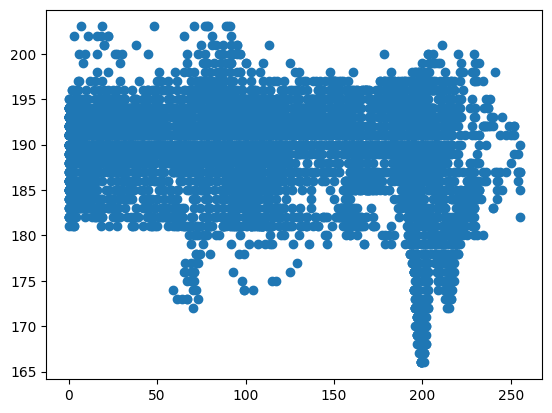

In [6]:
T2=G[10:90,10:90]
plt.scatter(T0,T2)
np.corrcoef(T0.reshape(-1),T2.reshape(-1))

In [7]:
%%writefile sim_corrcoef.py
import numpy as np
import matplotlib.pyplot as plt

def sim_corrcoef(num, xmax, s=0.05, a=1.55, b=0.25):
  x=np.linspace(0,xmax,num)
  y=a*x+b+np.random.normal(size=x.shape)*s
  r=np.corrcoef(x,y)
  plt.plot(x,y,'o')
  print('r={0}'.format(r[0,1]))
  return(r)

Writing sim_corrcoef.py


r=0.6886832190706971


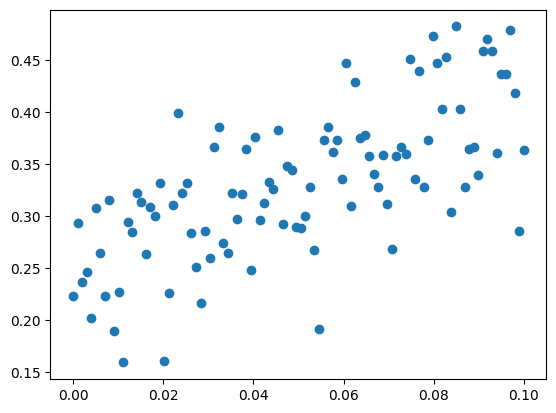

In [8]:
from sim_corrcoef import sim_corrcoef
_=sim_corrcoef(100,0.1)

r=0.7211107538598233


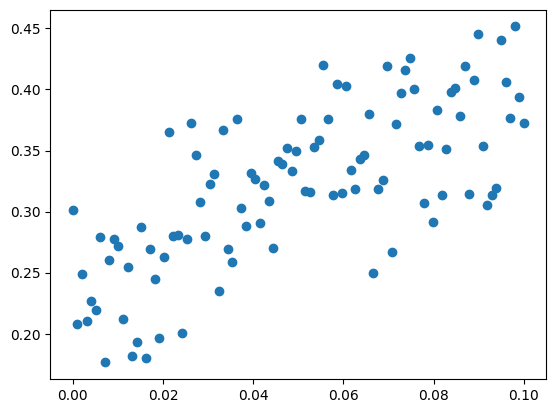

In [9]:
_=sim_corrcoef(100,0.1)

r=0.9746231179510244


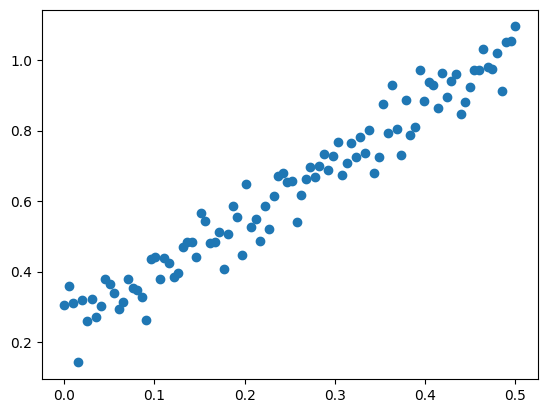

In [10]:
_=sim_corrcoef(100,0.5)

r=0.9749230769833829


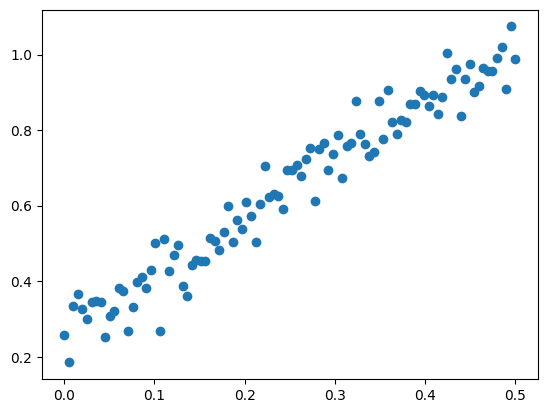

In [11]:
_=sim_corrcoef(100,0.5)

r=0.9937578454787421


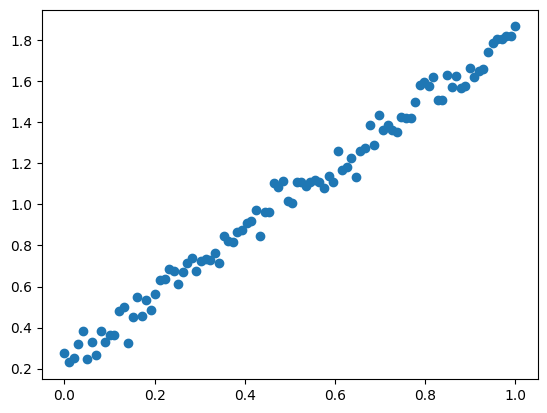

In [12]:
_=sim_corrcoef(100,1)

r=0.9945502225528643


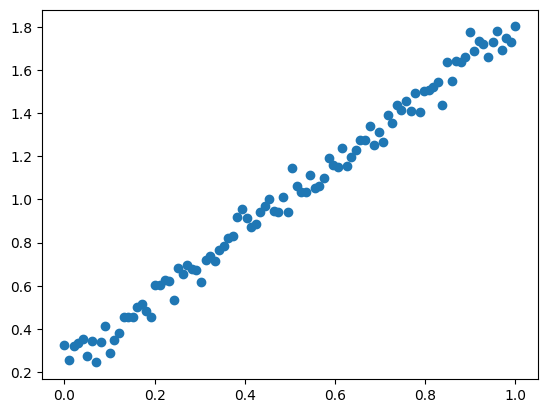

In [13]:
_=sim_corrcoef(100,1)

In [14]:
A=np.array([[9,18,14,11,10],[19,2,5,17,8],[15,20,4,1,7],
            [12,16,3,13,6]])
B=A[1:3,2:4]
B

array([[ 5, 17],
       [ 4,  1]])

In [15]:
B=B-np.mean(B)
B

array([[-1.75, 10.25],
       [-2.75, -5.75]])

In [16]:
signal.correlate2d(A,B)

array([[ -51.75, -128.25, -130.  , -101.75,  -87.75,  -27.5 ],
       [ -17.  ,  105.  ,   77.75,  -23.25,   -9.5 ,  -39.5 ],
       [ 108.5 , -169.  ,  -30.25,  148.75,    9.25,  -33.25],
       [  84.75,   53.75,  -55.25,  -79.75,   -0.25,  -28.75],
       [ 123.  ,  143.  ,    2.75,  128.  ,   38.75,  -10.5 ]])

In [17]:
A=A.astype(np.float32)
B=B.astype(np.float32)
res=cv2.matchTemplate(A,B,cv2.TM_CCORR)
res

array([[ 104.99999   ,   77.749985  ,  -23.250002  ,   -9.5       ],
       [-169.        ,  -30.25      ,  148.75      ,    9.250004  ],
       [  53.749996  ,  -55.25      ,  -79.74999   ,   -0.24999237]],
      dtype=float32)

In [18]:
cv2.minMaxLoc(res)

(-169.0, 148.75, (0, 1), (2, 1))